# HR ANALYTICS

### Business Problem : The MNC wants to identify employees likely to be promoted before the final evaluation to reduce delays in role transitions. Using historical performance, training, KPI, and demographic data, the analysis explores key factors driving promotions and provides insights for early decision-making

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\puspa\Downloads\HR-Analytics (DA)\HR-Analytics (DA)\train.csv")

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## Data Understanding

In [7]:
df.shape

(54808, 14)

In [8]:
for col in df.columns:
    print("The unique values in each column", col)
    print(df[col].unique())
    #print("\n")

The unique values in each column employee_id
[65438 65141  7513 ... 13918 13614 51526]
The unique values in each column department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
The unique values in each column region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
The unique values in each column education
["Master's & above" "Bachelor's" nan 'Below Secondary']
The unique values in each column gender
['f' 'm']
The unique values in each column recruitment_channel
['sourcing' 'other' 'referred']
The unique values in each column no_of_trainings
[ 1  2  3  4  7  5  6  8 10  9]
The 

In [9]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [37]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_80,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## Data Cleaning

In [11]:
df.rename(columns={'KPIs_met >80%': 'KPIs_met_80'}, inplace=True)

In [12]:
df.rename(columns={'awards_won?': 'awards_won'}, inplace=True)

In [13]:
df['education'].isnull().sum()

np.int64(2409)

In [14]:
# Percentage of missing values
missing_percent = df['education'].isnull().sum() / len(df) * 100
missing_percent

np.float64(4.395343745438622)

In [15]:
mode_value = df['education'].mode()[0]  # mode() returns a Series, take the first value
df['education'].fillna(mode_value, inplace=True)

In [16]:
df['education'].isnull().sum()

np.int64(0)

In [17]:
df['previous_year_rating'].isnull().sum()

np.int64(4124)

In [18]:
missing_percent = df['previous_year_rating'].isnull().sum() / len(df) * 100
missing_percent

np.float64(7.524448985549554)

In [19]:
previous_rating_mean = df['previous_year_rating'].mean()
previous_rating_median = df['previous_year_rating'].median()
print(previous_rating_mean, previous_rating_median)

3.329255780917055 3.0


In [20]:
replace = previous_rating_mean if previous_rating_mean < previous_rating_median else previous_rating_median
print(replace)

3.0


In [21]:
df['previous_year_rating'].fillna(replace, inplace=True)

In [22]:
df['previous_year_rating'].isnull().sum()

np.int64(0)

In [23]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met_80               int64
awards_won                int64
avg_training_score        int64
is_promoted               int64
dtype: object

# Exploratory Data Analysis

## Univariate Analysis

In [24]:
df['is_promoted'].value_counts(normalize=True)

is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64

### Promotion Distribution

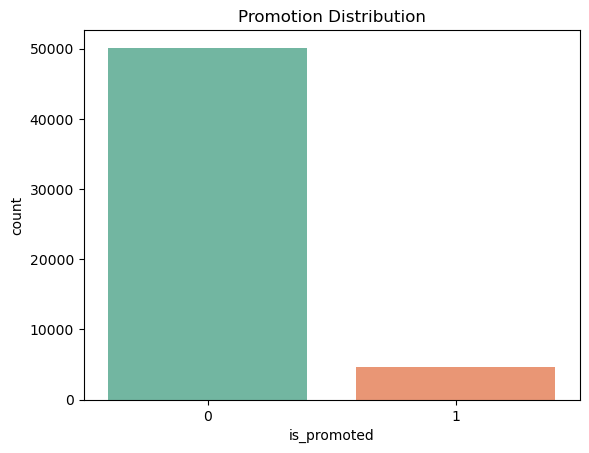

In [25]:
sns.countplot(x='is_promoted', data=df, palette='Set2')
plt.title('Promotion Distribution')
plt.show()

#### Promotions are highly imbalanced, with only a small proportion of employees getting promoted, indicating a selective promotion process. This highlights the need for early identification of high-potential employees using performance metrics to avoid delays and missed promotion opportunities.

### Age Distribution

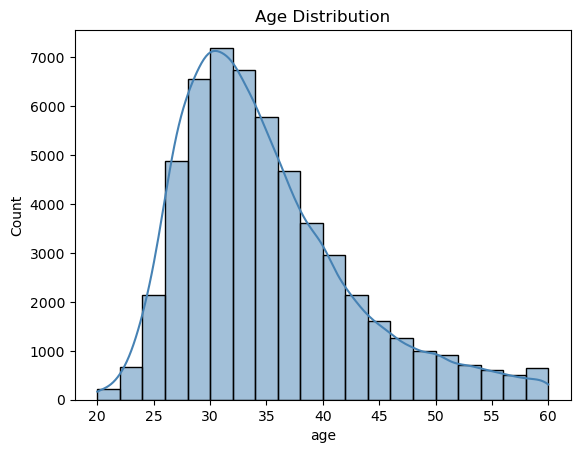

In [26]:
sns.histplot(df['age'], kde=True, bins=20, color='steelblue')
plt.title('Age Distribution')
plt.show()

#### Insight:Majority of employees fall in the 25–40 years age range.Very few employees are below 25 or above 45.
#### Business Interpretation:The workforce is largely mid-career, which is ideal for managerial pipeline development.HR should focus leadership training and succession planning on the 30–40 age group

### Lenght of service

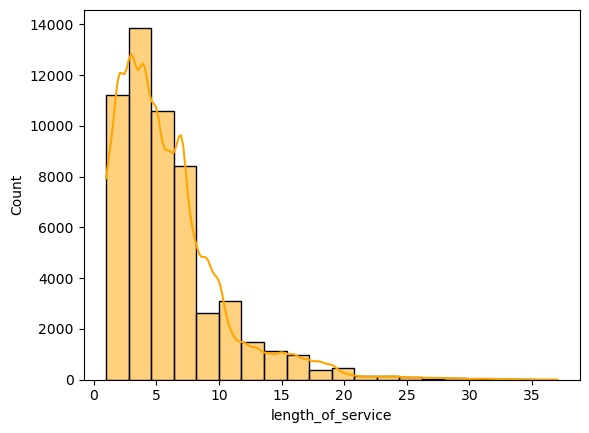

In [27]:
sns.histplot(df['length_of_service'], kde=True, bins=20, color='orange')
plt.show()

#### Insight:Most employees have 2–10 years of service.Distribution is right-skewed, with fewer long-tenured employees.
#### Business Interpretation:Employees with moderate experience form the core talent pool.HR can plan promotions and role transitions effectively by targeting employees with 5–10 years of experience.

### Department

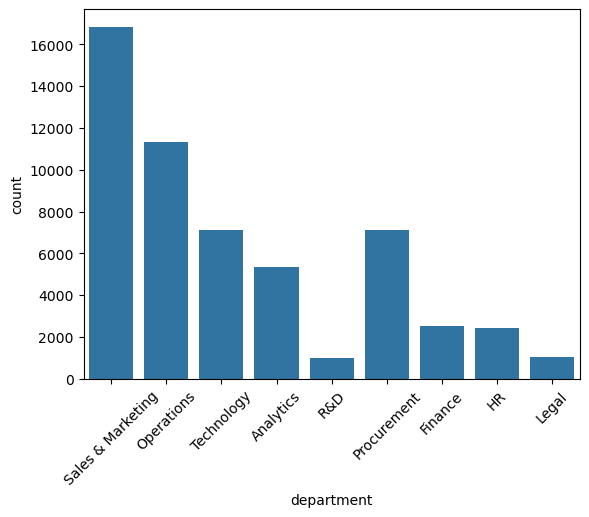

In [28]:
sns.countplot(x='department', data=df)
plt.xticks(rotation=45)
plt.show()

#### Insight:Sales & Marketing has the highest employee count.Other departments like Technology, Operations, and Analytics have smaller but focused teams.
#### Business Interpretation:Larger departments face higher competition for promotions.HR should ensure fair and department-specific promotion criteria to avoid bias due to headcount differences.

### Avg Training score

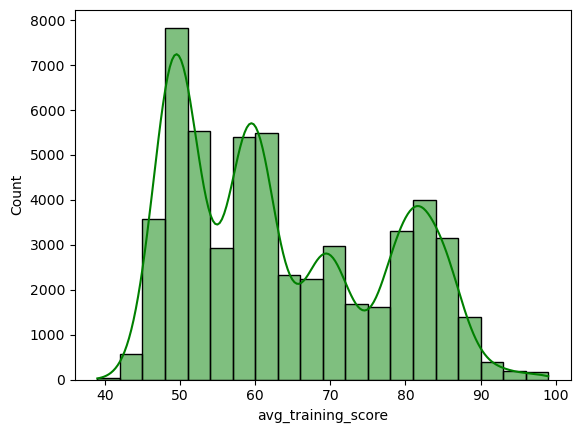

In [29]:
sns.histplot(df['avg_training_score'], kde=True, bins=20, color='green')
plt.show()

#### Insight:Training scores mostly lie between 50 and 80.Few employees score exceptionally high (>85).
#### Business Interpretation:Majority of employees meet training expectations, but high performers stand out clearly.High training scorers can be flagged early for promotion readiness and leadership roles.

# Bivariate Analysis

### Department Vs Promotion

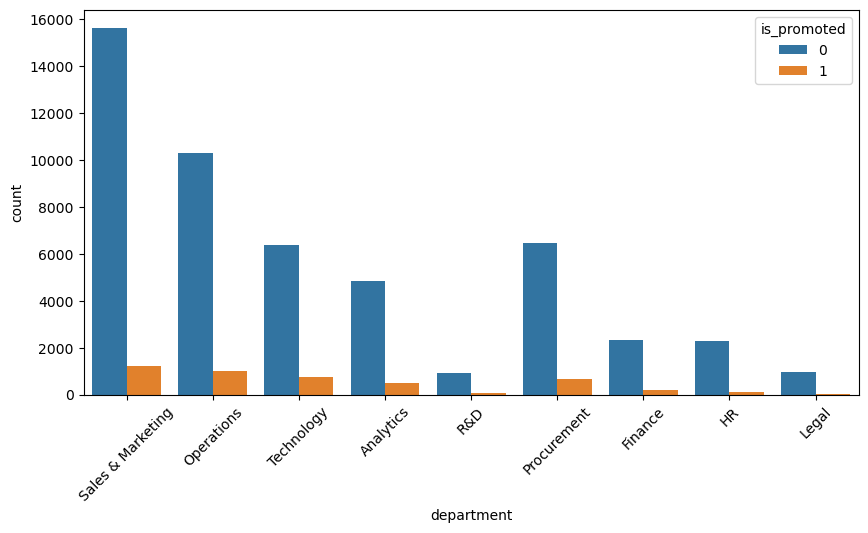

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='department', hue='is_promoted', data=df)
plt.xticks(rotation=45)
plt.show()

#### Insight:Promotion rates vary across departments.Technology and Analytics departments show higher promotion ratios.Sales & Marketing has a lower promotion rate despite having a large employee count, indicating higher competition or stricter criteria.
#### Business Interpretation :Promotion opportunities are not evenly distributed across departments.Departments with skill-intensive roles (Tech/Analytics) promote more frequently due to specialized talent demand.HR should introduce department-specific training and mentoring programs, especially in Sales & Marketing, to improve promotion readiness.

### Awards won vs Promotion

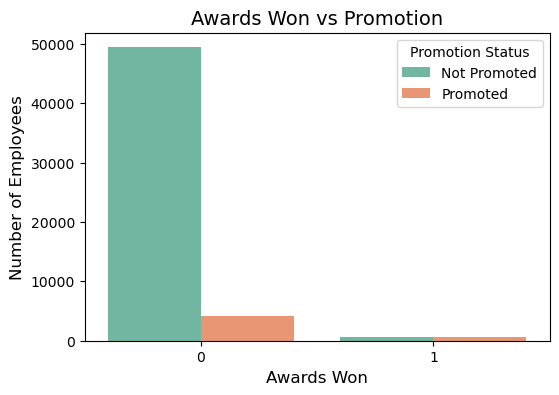

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='awards_won', hue='is_promoted', data=df, palette='Set2')
plt.title('Awards Won vs Promotion', fontsize=14)
plt.xlabel('Awards Won', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Promotion Status', labels=['Not Promoted', 'Promoted'])
plt.show()

#### Insight:Employees who have won awards show a significantly higher promotion rate compared to those who haven’t.Award winners form a smaller group but contribute disproportionately to promotions.
#### Business Interpretation:Awards act as a strong indicator of high performance and leadership potential.Recognition programs effectively identify future managers.Award-winning employees should be fast-tracked for leadership training and early promotion checkpoints.

### Kpi met >80%

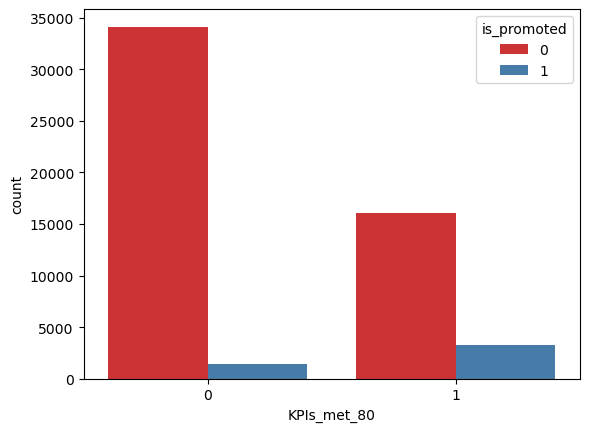

In [32]:
sns.countplot(x='KPIs_met_80', hue='is_promoted', data=df, palette='Set1')
plt.show()

#### Insight:Employees who met KPIs greater than 80% have a much higher likelihood of promotion.Very few promotions occur when KPIs are not met.
#### Business Interpretation:KPI completion is the most critical business driver for promotion decisions.KPI achievement reflects both performance consistency and business impact.KPI completion should be used as the primary eligibility filter for early promotion prediction.

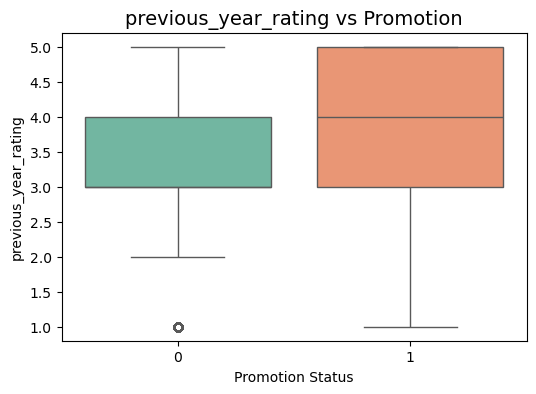

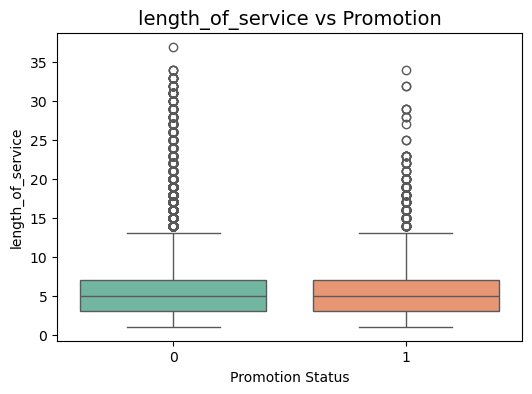

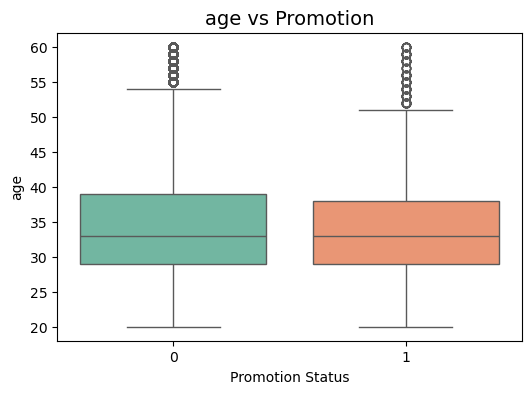

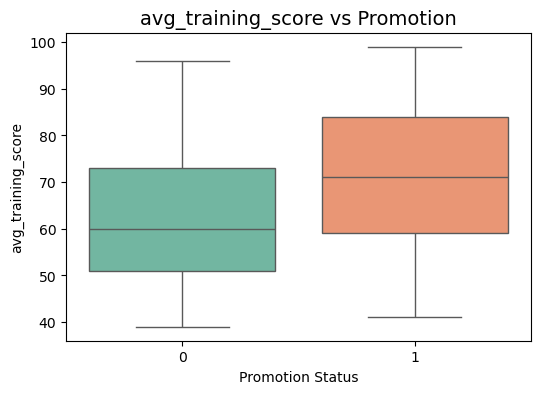

In [33]:
numerical_cols = ['previous_year_rating', 'length_of_service', 'age','avg_training_score']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='is_promoted', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Promotion', fontsize=14)
    plt.xlabel('Promotion Status')
    plt.ylabel(col)
    plt.show()

### Previous Year Rating vs Promotion
#### Employees with higher previous year ratings (4–5) are much more likely to be promoted.Ratings 1–3 show very low promotion probability.
#### Business Interpretation:Past performance is a strong predictor of promotion.HR can prioritize employees with high ratings for early promotion checkpoints.
### Length of Service vs Promotion
#### Insight:Promotions mostly occur for employees with 5–10 years of service.Very junior (<5 years) or very senior (>15 years) employees have lower promotion probability.
#### Business Interpretation:Employees in the optimal experience range are the most eligible for promotion.HR can target training and succession planning for this group.
### Age vs Promotion
#### Insight:Most promoted employees are in the 30–40 years age range.Younger (<25) or older (>45) employees are less likely to be promoted.
#### Business Interpretation:Mid-career employees are ideal candidates for promotion.Age + experience can help filter early promotion-ready employees.

## Multivariate Analysis

### KPI + Training Score + Promotion

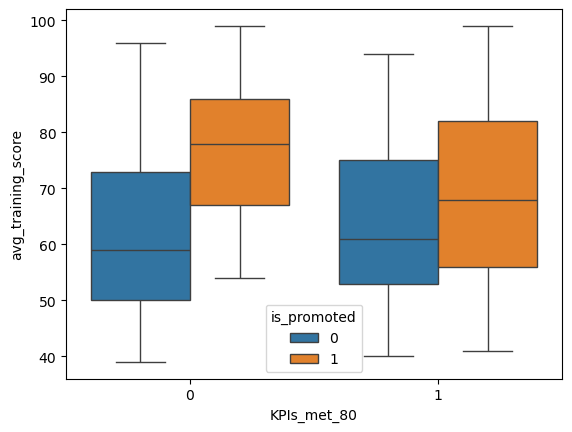

In [34]:
sns.boxplot(
    x='KPIs_met_80',
    y='avg_training_score',
    hue='is_promoted',
    data=df)
plt.show()

#### Insight:Employees who meet KPIs (>80%) and have high average training scores show the highest promotion probability.High training scores alone are not sufficient if KPI targets are not met.Promotion likelihood drops sharply when both KPI completion and training performance are low.
#### Business Interpretation:Promotion decisions depend on a combination of performance outcomes (KPIs) and capability development (training).HR should use KPI completion as a primary filter, followed by training score as a secondary qualifier.Employees close to KPI thresholds but with strong training scores can be coached early to improve promotion readiness.

### Age + Length of Service + Promotion

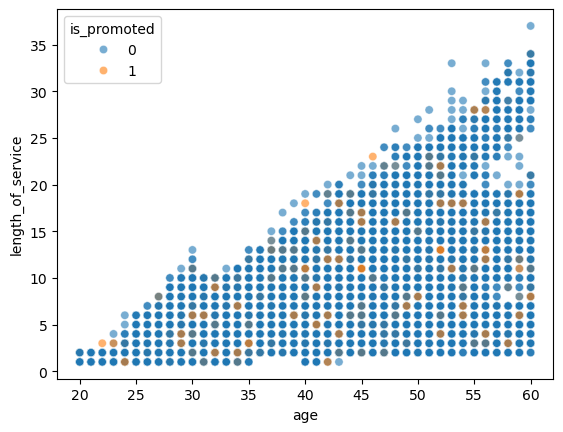

In [35]:
sns.scatterplot(
    x='age',
    y='length_of_service',
    hue='is_promoted',
    data=df,
    alpha=0.6
)
plt.show()


#### Insight:Promotions are concentrated among employees aged 30–40 years with 5–10 years of service.Very young employees with low tenure and older employees with very long tenure show lower promotion rates.A clear career maturity zone exists where promotion likelihood is highest.
#### Business Interpretation:Promotion readiness is strongly linked to career stage and experience balance.HR can use age and tenure together to identify employees in the optimal promotion window.This helps in succession planning, ensuring leadership pipelines are filled proactively rather than reactively.

### Department-wise KPI Impact

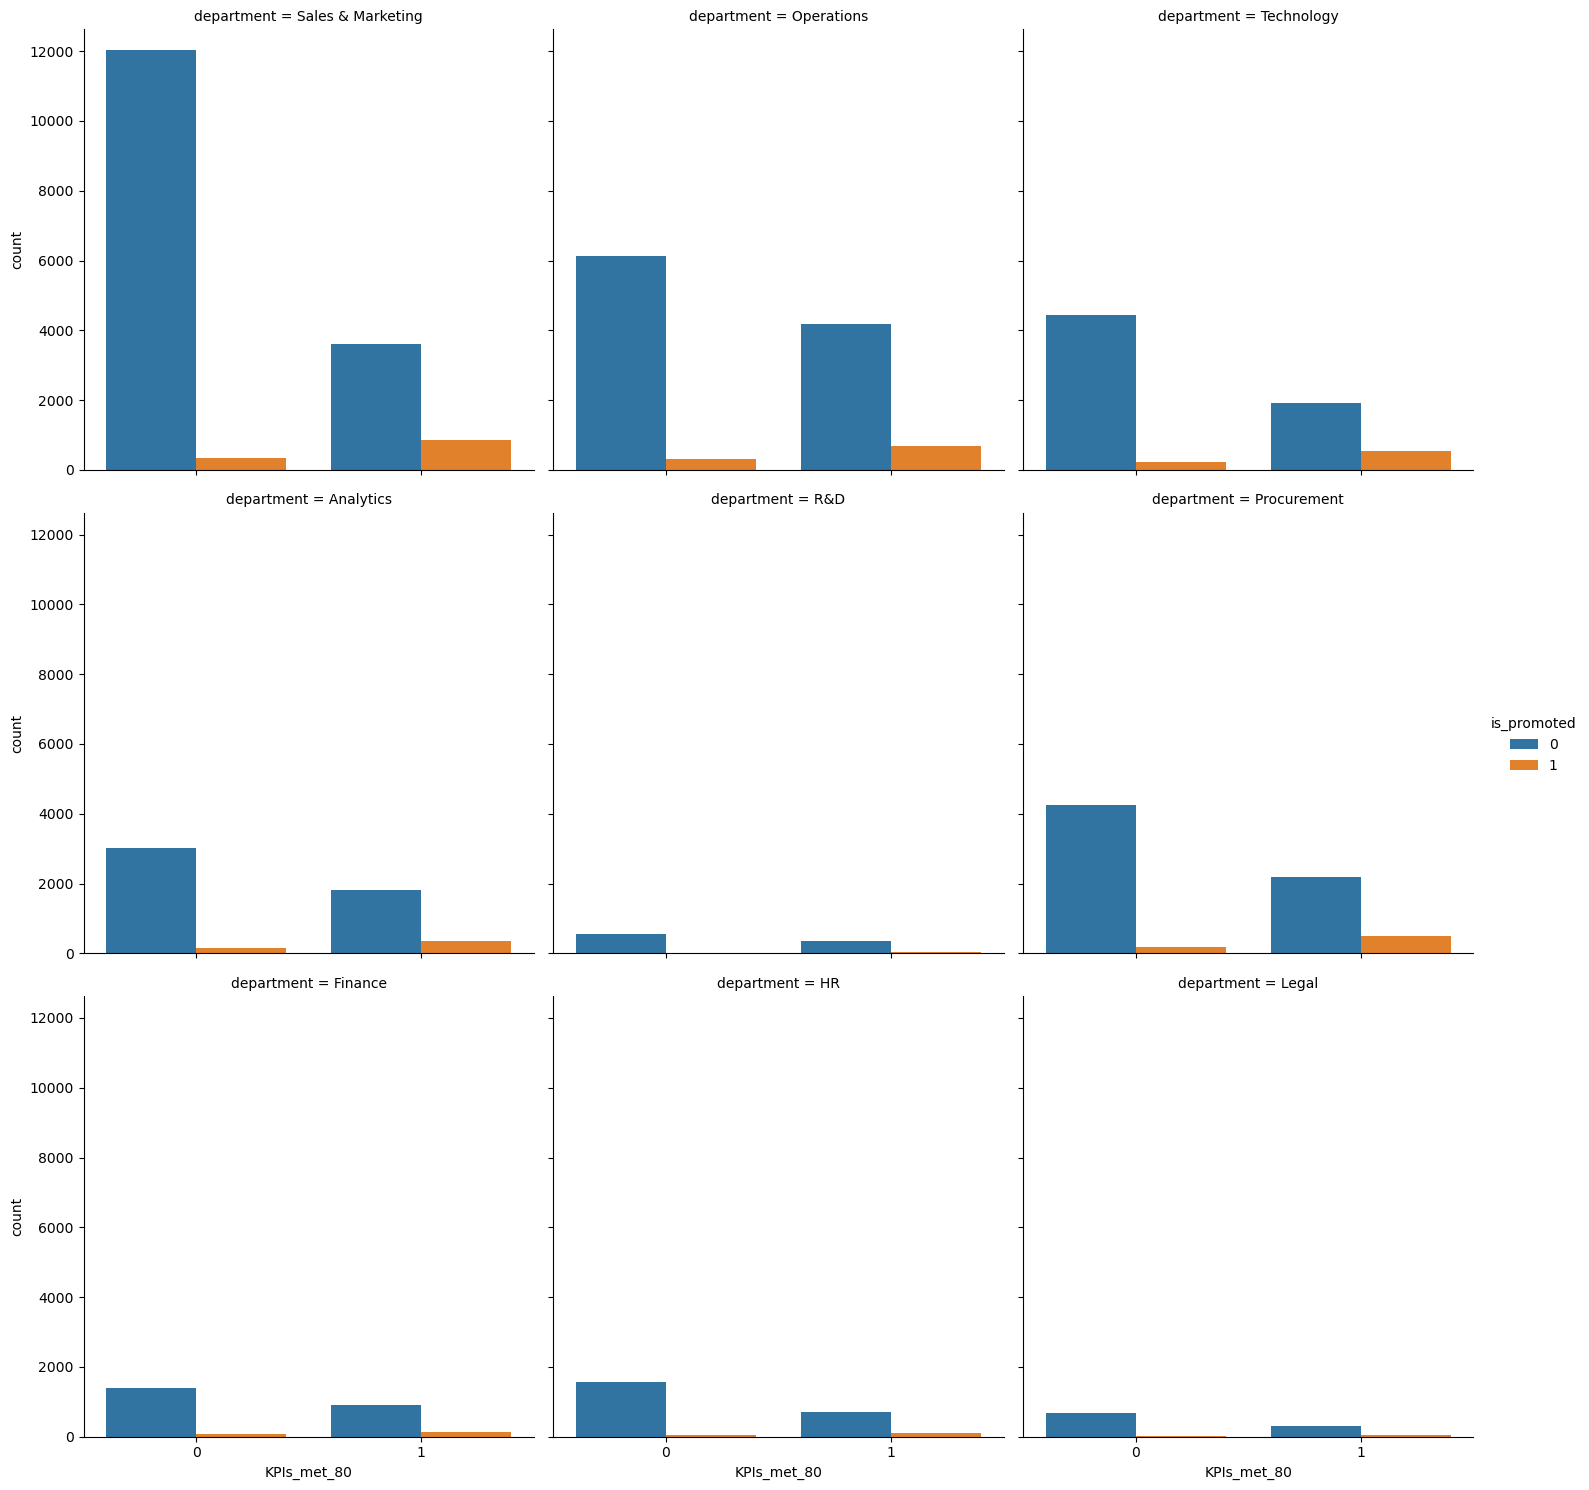

In [36]:
sns.catplot(
    x='KPIs_met_80',
    hue='is_promoted',
    col='department',
    data=df,
    kind='count',
    col_wrap=3
)
plt.show()

## Conclusion
#### The analysis shows that employee promotions are largely driven by performance-related factors rather than demographic attributes. KPI completion above 80%, high average training scores, strong previous year ratings, and awards won are the most influential indicators of promotion readiness. Promotions are most common among employees in the 30–40 age group with 5–10 years of service, highlighting an optimal career stage for leadership roles. 
#### Department-wise trends indicate higher promotion ratios in Technology and Analytics, while larger departments like Sales & Marketing face greater competition. Multivariate analysis confirms that combining KPI performance with training outcomes provides the most reliable signal for early promotion identification. Leveraging these insights at a checkpoint stage can help the organization reduce promotion delays, improve workforce planning, and enable data-driven promotion decisions.